Thanks a lot for your email and assignment. This assignment pushed me to work hard.

----------------------------------------------------------------------
Challenges 

1) Data was without Mapping

2) Data Image has different  Height and Width and channel
For solving upper two problem i have created a code for reshaping image
and converting it into a grayscale image 

I Have also uploaded that code in Google colab Name as -- RGB IMAGE TO GRAYSCALE.ipynb

Challenges

3) For Defining best Batch size and learning I have created a code in pytorch using Tensor Board 


I Have also uploded that code in Google colab Name as -- Code for Defining Batch Size and Leraning Rate using pytorch and Tensor Board.ipynb

----------------------------------------------------------------------

Due to the large size of the data, Google Colab was crashing every time I train the model. So, I have manually deleted some of the data images and then trained the model.

Train set consists of 11 different classes with data size of 3174

Test set consists of 11 different classes with data size of 1088



**Providing link to connect google Drive**

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/dataset"

Test  train


**Importing Necessary module of deep learning**

In [0]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
from collections import OrderedDict
import json
import torchvision 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import pdb

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True) 
from torch.utils.tensorboard import SummaryWriter


**Providing Path of Train Data**

In [0]:
data_dir = "/content/drive/My Drive/dataset/"
train_dir = data_dir + '/train'
using_gpu = torch.cuda.is_available()

**Loading data in Data set in pytorch with Normalizing data For Train Set**

In [0]:
train_set  = torchvision.datasets.ImageFolder(train_dir, 
                                        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

 )

**Loading data in Data loader with batch size for Train Data Set**

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)

**Defining classes for sub folders**

In [0]:
classes = ('category 1','category 2','category 3','category 4','category 5','category 7',
          'category 8','category 9','category 10','category 11')

Classes Descriptions

1) Category 1  -- Men jeans Images

2) Category 2  -- Men shoes

3) Category 3  -- Men shorts

4) Category 4  -- Men Tshirts

5) Category 5  -- Men Underpants

6) Category 7  -- Womens Wear

7) Category 8  -- Women Upper Body innerwear

8) Category 9  -- Women Dress

9) Category 10 -- Women Jeans
10 Category 11 -- women Lower Body Innerwear
11)Category 12 -- Women Shoes 


**Ploting pictures form train data set**

If shows error run again it will run properly



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


category 2 category 2 category 1 category 7


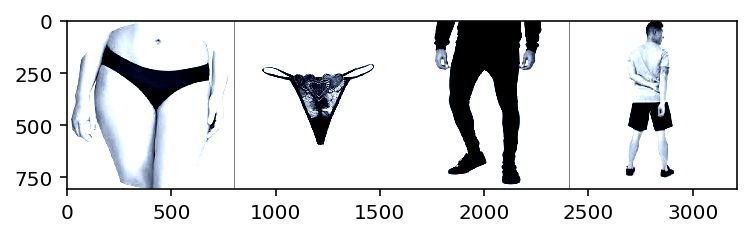

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Creating function for Get Num Correct**

In [0]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()


**CNN Architecture**

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 12, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(12*197*197, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 11)
        


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    # Reshaping the tensor to BATCH_SIZE x 320. Torch infers this from other dimensions when one of the parameter is -1.
        x = x.view(-1, 12 * 197 * 197)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.dropout(x)
        x = self.fc3(x)
        
        return x

In [0]:
network = Network()

In [0]:
for name, param in network.named_parameters():
    print(name,'\t\t',param.shape)

conv1.weight 		 torch.Size([6, 3, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 465708])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
fc3.weight 		 torch.Size([11, 60])
fc3.bias 		 torch.Size([11])


**For CNN we are using leraning rate = 0.001 and optimizer Adam Learning rate and batch size is defined by using pytorch and Tensor board (Assignment 2)**

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=False)
optimizer = optim.Adam(network.parameters(), lr=0.001)
  

**Training a model from scratch No of epoch == 60 & Loss function == Cross Entropy**

In [0]:
for epoch in range(60):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch # complete image in single epoch with 
                               # batch size 100 
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad() # doning zero grad value after every mini batch 
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )



epoch 0 total_correct: 275 loss: 425.55087691545486
epoch 1 total_correct: 280 loss: 81.87995171546936
epoch 2 total_correct: 286 loss: 81.69326043128967
epoch 3 total_correct: 296 loss: 81.65716242790222
epoch 4 total_correct: 300 loss: 81.57477355003357
epoch 5 total_correct: 322 loss: 81.4687602519989
epoch 6 total_correct: 390 loss: 80.9366295337677
epoch 7 total_correct: 398 loss: 81.19059729576111
epoch 8 total_correct: 408 loss: 81.07297480106354
epoch 9 total_correct: 479 loss: 79.21301102638245
epoch 10 total_correct: 590 loss: 76.95758831501007
epoch 11 total_correct: 628 loss: 76.91562128067017
epoch 12 total_correct: 683 loss: 74.08430874347687
epoch 13 total_correct: 752 loss: 72.36165165901184
epoch 14 total_correct: 933 loss: 69.5360072851181
epoch 15 total_correct: 995 loss: 67.90716421604156
epoch 16 total_correct: 1091 loss: 65.71789920330048
epoch 17 total_correct: 1275 loss: 61.81019365787506
epoch 18 total_correct: 1301 loss: 59.918092489242554
epoch 19 total_corre

**Providing Path of Test Data**

In [0]:
data_dir = "/content/drive/My Drive/dataset2/"
Test_dir = data_dir + '/test'

In [0]:
ls"/content/drive/My Drive/dataset2"

test/  train/


**Loading data in Data set in pytorch with Normalizing data For Test Set**

In [0]:
Test_set  = torchvision.datasets.ImageFolder(Test_dir , 
                                        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

 )

**Loading data in Data loader with batch size for Train Data Set**

In [0]:
Test_loader = torch.utils.data.DataLoader(Test_set, batch_size=100, shuffle=True)

Passing test data in model

In [0]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in prediction_loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat((all_preds, preds),dim=0)
    return all_preds

**Passing Test Data**

In [0]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(Test_set, batch_size=100,shuffle=False)
    Test_preds = get_all_preds(network, prediction_loader)

In [0]:
import numpy
Test_set.targets = torch.from_numpy(numpy.array(Test_set.targets, dtype='int64'))

**Printing Result Getting accuracy 94 %**

In [0]:
preds_correct = get_num_correct(Test_preds, Test_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(Test_set)*100)


total correct: 1258
accuracy: 94.80030143180106


**CNN Confusion Matrix with PyTorch**

In [0]:
 stacked = torch.stack(
    (
        test_set.targets
        ,test_preds.argmax(dim=1)
    )
    ,dim=1
)

In [0]:
cmt = torch.zeros(11,11, dtype=torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

In [0]:
cmt

tensor([[ 28,   0,   1,   7,   2,   2,   1,   1,   4,   1,   6],
        [  2,  98,   2,   0,   0,   1,   1,   0,   1,   0,   0],
        [  1,   1,  57,   3,   9,   1,   2,   1,   6,   2,   1],
        [  4,   1,   2,  65,   5,   2,   6,   3,   7,   5,   5],
        [  1,   3,  13,   3,  76,   5,   4,   3,   4,   1,   1],
        [  5,   3,   3,   4,   3,  46,   2,   6,   4,   1,  11],
        [  3,   4,   1,   8,   1,   1,  58,   1,   4,   7,   3],
        [  2,  13,  10,   3,   5,   4,   6,  12,  10,   1,   3],
        [  2,   2,   4,   7,   5,   2,   3,   0, 106,   4,   5],
        [  4,   5,   2,  16,   7,   5,  10,   5,   8,  62,   3],
        [  7,   5,   2,  45,   1,   6,   1,   1,   8,   5,  20]])